<a href="https://colab.research.google.com/github/codeRSH/AAG-DS/blob/main/AAG_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis using Python

## Initial Setup

### Mount Drive to Read files

In [123]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import All Relevant Libraries

In [124]:
import glob
import pandas as pd
import numpy as np

### Make Plots show within the notebook output

In [274]:
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

### Ignore Warnings (for clean output)

In [126]:
import warnings
warnings.filterwarnings('ignore')

### Define File Paths

In [127]:
init_input_path = "/content/drive/MyDrive/AAG DS Folder/Capstone/input/"

linfol_path = init_input_path + "LINFOL/*CSV"
kna1_path = init_input_path + "KNA1/*csv"
hueres_path = init_input_path + "HUERES/*csv"
rsrvs_path =  init_input_path + "RSRVS/*csv"

init_output_path = "/content/drive/MyDrive/AAG DS Folder/Capstone/output/"
guest_not_cust_path = init_output_path + "guest_not_cust.csv"
guest_with_10plus_reserv_path = init_output_path + "guest_with_10plus_reserv.csv"
main_cust_with_10plus_reserv_path = init_output_path + "main_cust_with_10plus_reserv.csv"

## Data Loading and Wrangling

### LINFOL - Hotel Revenue Data

In [128]:
# Linfol Data
linfol_data = pd.DataFrame()

# print(glob.glob(kna1_path))

# Read the LINFOL data from all the available csv files
for file in glob.glob(linfol_path):
    data = pd.read_csv(file, parse_dates=True, encoding="unicode_escape", sep='\t', 
                       header=None, skiprows=[0],
                       error_bad_lines=False, warn_bad_lines=False)
    linfol_data = linfol_data.append(data)

In [129]:
# Remove unwanted columns. 
linfol_data = linfol_data.drop(columns=[2, 4])

# Provide the Column Names
linfol_data.columns = ["Hotel_ID", "Reservation_ID", "Concept", "Revenue_Date", "Revenue", "Tax"]
linfol_data 

,Hotel_ID,Reservation_ID,Concept,Revenue_Date,Revenue,Tax
0,AGR1,3750093.0,BREAKFAST,24.07.2018,400,72
1,AGR1,3750093.0,SERVCHRG,24.07.2018,120,21.6
2,AGR1,3750093.0,ALLOWFNB,26.07.2018,519.200000+AC0-,0
3,AGR1,3750102.0,BREAKFAST,24.07.2018,400,72
4,AGR1,3750102.0,SERVCHRG,24.07.2018,120,21.6
...,...,...,...,...,...,...
162648,VTZ1,3759378.0,ROOM,31.07.2018,704.53,126.8154
162649,VTZ1,3759378.0,PAYWOIV,31.07.2018,"1,168.200000+AC0-",0
162650,VTZ1,3760051.0,ONLYROOM,31.07.2018,786.34,0
162651,VTZ1,3760051.0,ONLYROOM,31.07.2018,786.33,0


In [130]:
# Determine null values in each columns
linfol_data.isna( ).mean().round(4) * 100

Hotel_ID           0.00
Reservation_ID    17.38
Concept           17.38
Revenue_Date      17.38
Revenue           17.38
Tax               17.38
dtype: float64

In [131]:
# Remove rows where Reservation ID is null
linfol_data.dropna( subset=["Reservation_ID"], inplace = True )

# Convert Reservation ID to integer
linfol_data["Reservation_ID"] = linfol_data["Reservation_ID"].astype(int)

In [132]:
# Convert Revenue Date from String to Date format
linfol_data["Revenue_Date"] = pd.to_datetime(linfol_data["Revenue_Date"], dayfirst=True).apply(lambda x : x.date())

In [133]:
# Remove +AC0- which is a wrong text in Revenue and Tax fields

linfol_data['Concept'] = linfol_data['Concept'].apply(lambda x : 
                            x.replace("+AC0-", "").replace(",", "") 
                            if "+AC0-" in x else x)

linfol_data['Concept'] = linfol_data['Concept'].apply(lambda x : 
                            x.replace("+ACY-", "").replace(",", "") 
                            if "+ACY-" in x else x)

linfol_data['Revenue'] = linfol_data['Revenue'].apply(lambda x : np.float(
                            x.replace("+AC0-", "").replace(",", "") 
                            if "+AC0-" in str(x) else np.float(x)))
linfol_data['Tax']     = linfol_data['Tax'].apply(lambda x : np.float(
                            x.replace("+AC0-", "").replace(",", "") 
                            if "+AC0-" in str(x) else np.float(x)))

# Create Total Column 
linfol_data['Total'] = linfol_data['Revenue'] + linfol_data['Tax']

# Remove the Revenue and Tax columns
linfol_data.drop(columns = ["Revenue", "Tax"], inplace = True)

linfol_data.head()

,Hotel_ID,Reservation_ID,Concept,Revenue_Date,Total
0,AGR1,3750093,BREAKFAST,2018-07-24,472.0
1,AGR1,3750093,SERVCHRG,2018-07-24,141.6
2,AGR1,3750093,ALLOWFNB,2018-07-26,519.2
3,AGR1,3750102,BREAKFAST,2018-07-24,472.0
4,AGR1,3750102,SERVCHRG,2018-07-24,141.6


In [134]:
# Also, keep a copy so as to not have to re-read the data. 
linfol_copy = linfol_data
linfol_data = linfol_copy

In [135]:
linfol_data = linfol_data.pivot_table(values="Total", index=["Hotel_ID", "Reservation_ID", "Revenue_Date"], columns="Concept", fill_value=0).reset_index()
linfol_data

Concept,Hotel_ID,Reservation_ID,Revenue_Date,ALLOWADVSL,ALLOWCAR,ALLOWCNF,ALLOWCP,ALLOWFNB,ALLOWGMART,ALLOWLADRY,ALLOWLNDRY,ALLOWOTH,ALLOWPAX,ALLOWROOM,ALLOWSTRY,ALLOWSVCHG,ALLOWWIFI,ALLWAUDVSL,ALLWSTNRY,AMEND,AP,AUDVSL,BANQ,BEVERAGE,BREAKFAST,CANCEL,CAR,CARHIRE,CP,DECO,DINNER,DISCOUNTS,DOCCALL,EARLY,EXTRABED,FB(POS),FNBBFAST,FNBDINNER,FNBLUNCH,FOREX,GINGERMART,KKCTAX,KKCTAXAC,LATE,LAUNDRY,LTAX,LTXLT,LTXMTG,LUNCH,MAP,MEAL,MEETING,MISC,MISCFO,MISCSMEAL,NOSHOW,ONLYROOM,PAX,PAYWOIV,PAYWTIV,PROMOTION,ROOM,ROOMS,SAFE,SBCTAX,SBCTAXAC,SERTAXAC,SERTAXSCG,SERVCHRG,SERVCHRG2,SERVCHRGR,SERVTAX,STATIONARY,STATIONERY,TELCON,TELISD,TELLOC,TELSTD,WIFI
0,AGR1,2711891,2017-04-07,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,304.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,3777.990,0.0,0.0,0.00,0.0,0,0.00,0.00,0.000,42.660,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,AGR1,2711891,2017-04-09,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,932.020,0.0,0.0,0.00,0.0,0,0.00,0.00,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,AGR1,2711891,2017-04-10,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.52,11.40,0.00,0.0,569.760,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,1878.39,0.0,0,1.52,11.40,319.060,42.650,304.6800,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,AGR1,2711891,2017-04-11,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,379.83,0.0,0.0,0.0,0.0,960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.90,11.40,0.00,0.0,569.760,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,1991.805,0.0,0.0,1878.39,0.0,0,1.90,11.40,319.060,53.180,379.8400,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,AGR1,2711891,2017-04-12,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1879.39,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.94,5.64,1878.39,0.0,281.835,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,726.400,0.0,0.0,0.00,0.0,0,0.94,5.64,157.825,26.305,187.8900,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868348,VTZ2,4178260,2019-04-30,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2372.5856,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.00,0.0,0,0.00,0.00,0.000,0.000,166.0736,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1868349,VTZ2,4178260,2019-05-01,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2372.5856,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.00,0.0,0,0.00,0.00,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1868350,VTZ2,4178260,2019-05-02,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2372.5856,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.00,0.0,0,0.00,0.00,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1868351,VTZ2,4178741,2019-04-30,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.

In [136]:
linfol_data.columns

Index(['Hotel_ID', 'Reservation_ID', 'Revenue_Date', 'ALLOWADVSL', 'ALLOWCAR',
       'ALLOWCNF', 'ALLOWCP', 'ALLOWFNB', 'ALLOWGMART', 'ALLOWLADRY',
       'ALLOWLNDRY', 'ALLOWOTH', 'ALLOWPAX', 'ALLOWROOM', 'ALLOWSTRY',
       'ALLOWSVCHG', 'ALLOWWIFI', 'ALLWAUDVSL', 'ALLWSTNRY', 'AMEND', 'AP',
       'AUDVSL', 'BANQ', 'BEVERAGE', 'BREAKFAST', 'CANCEL', 'CAR', 'CARHIRE',
       'CP', 'DECO', 'DINNER', 'DISCOUNTS', 'DOCCALL', 'EARLY', 'EXTRABED',
       'FB(POS)', 'FNBBFAST', 'FNBDINNER', 'FNBLUNCH', 'FOREX', 'GINGERMART',
       'KKCTAX', 'KKCTAXAC', 'LATE', 'LAUNDRY', 'LTAX', 'LTXLT', 'LTXMTG',
       'LUNCH', 'MAP', 'MEAL', 'MEETING', 'MISC', 'MISCFO', 'MISCSMEAL',
       'NOSHOW', 'ONLYROOM', 'PAX', 'PAYWOIV', 'PAYWTIV', 'PROMOTION', 'ROOM',
       'ROOMS', 'SAFE', 'SBCTAX', 'SBCTAXAC', 'SERTAXAC', 'SERTAXSCG',
       'SERVCHRG', 'SERVCHRG2', 'SERVCHRGR', 'SERVTAX', 'STATIONARY',
       'STATIONERY', 'TELCON', 'TELISD', 'TELLOC', 'TELSTD', 'WIFI'],
      dtype='object', name='Concep

In [137]:
linfol_data.fillna(value = 0)
linfol_data["MP"] = linfol_data[["MAP", "AP"]].sum(axis = 1)

linfol_data["MEAL"] = linfol_data[["ALLOWFNB", "FNBDINNER", "FNBLUNCH", "MEAL", "BREAKFAST", "FNBBFAST"]].sum(axis = 1)

linfol_data["ROOM"] = linfol_data[["ROOM", "ONLYROOM", "ALLOWROOM", "CP", "ALLOWCP", 
                                   "AMEND", "SERVCHRG", "SERVCHRG2", "SERVCHRGR", 
                                   "ALLOWSVCHG", "PROMOTION", "EXTRABED", "NOSHOW", 
                                   "CANCEL"]].sum(axis = 1)

linfol_data["VAS"] = linfol_data[["LAUNDRY", "GINGERMART", "CARHIRE", "ALLOWLNDRY", 
                                  "ALLOWWIFI", "ALLOWGMART", "WIFI", "ALLOWOTH", 
                                  "STATIONERY", "ALLOWCAR", "MEETING", "ALLOWLADRY",
                                  "AUDVSL", "ALLWAUDVSL", "ALLWSTNRY" ]].sum(axis = 1)                                  

linfol_data["MISC"] = linfol_data[["PAX", "PAYWTIV", "PAYWOIV"]].sum(axis = 1)

linfol_data

Concept,Hotel_ID,Reservation_ID,Revenue_Date,ALLOWADVSL,ALLOWCAR,ALLOWCNF,ALLOWCP,ALLOWFNB,ALLOWGMART,ALLOWLADRY,ALLOWLNDRY,ALLOWOTH,ALLOWPAX,ALLOWROOM,ALLOWSTRY,ALLOWSVCHG,ALLOWWIFI,ALLWAUDVSL,ALLWSTNRY,AMEND,AP,AUDVSL,BANQ,BEVERAGE,BREAKFAST,CANCEL,CAR,CARHIRE,CP,DECO,DINNER,DISCOUNTS,DOCCALL,EARLY,EXTRABED,FB(POS),FNBBFAST,FNBDINNER,FNBLUNCH,FOREX,...,KKCTAX,KKCTAXAC,LATE,LAUNDRY,LTAX,LTXLT,LTXMTG,LUNCH,MAP,MEAL,MEETING,MISC,MISCFO,MISCSMEAL,NOSHOW,ONLYROOM,PAX,PAYWOIV,PAYWTIV,PROMOTION,ROOM,ROOMS,SAFE,SBCTAX,SBCTAXAC,SERTAXAC,SERTAXSCG,SERVCHRG,SERVCHRG2,SERVCHRGR,SERVTAX,STATIONARY,STATIONERY,TELCON,TELISD,TELLOC,TELSTD,WIFI,MP,VAS
0,AGR1,2711891,2017-04-07,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,304.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,0.0,0.0,3777.990,0.0,0.0,0.0,0.0000,0.0,3777.990,0.0,0.0,304.6800,0.0,0,0.00,0.00,0.000,42.660,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,AGR1,2711891,2017-04-09,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,0.0,0.0,932.020,0.0,0.0,0.0,0.0000,0.0,932.020,0.0,0.0,0.0000,0.0,0,0.00,0.00,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,AGR1,2711891,2017-04-10,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.52,11.40,0.00,0.0,569.760,0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,2183.0700,0.0,0,1.52,11.40,319.060,42.650,304.6800,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,960.0,0.0
3,AGR1,2711891,2017-04-11,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,379.83,0.0,0.0,0.0,0.0,960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.90,11.40,0.00,0.0,569.760,0,0.0,0.0,0.0,0.0,0.0,1991.805,0.0,0.0,0.0,0.0000,0.0,1991.805,0.0,0.0,2638.0600,0.0,0,1.90,11.40,319.060,53.180,379.8400,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,960.0,0.0
4,AGR1,2711891,2017-04-12,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1879.39,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.94,5.64,1878.39,0.0,281.835,0,0.0,0.0,0.0,0.0,0.0,726.400,0.0,0.0,0.0,0.0000,0.0,726.400,0.0,0.0,2067.2800,0.0,0,0.94,5.64,157.825,26.305,187.8900,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868348,VTZ2,4178260,2019-04-30,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2372.5856,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,2538.6592,0.0,0,0.00,0.00,0.000,0.000,166.0736,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1868349,VTZ2,4178260,2019-05-01,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2372.5856,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,2372.5856,0.0,0,0.00,0.00,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1868350,VTZ2,4178260,2019-05-02,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2372.5856,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.000,0,0.0,0.0,0.0,354.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,2372.5856,0.0,0,0.00,0.00,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1868351,VTZ2,4178741,2019-04-30,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00

In [138]:
linfol_data = linfol_data[['Hotel_ID', 'Reservation_ID', 'Revenue_Date', 'MP', 'MEAL', 'ROOM', 'VAS', 'MISC', 'EARLY', 'LATE' ]]


In [139]:
linfol_data = linfol_data.groupby(["Hotel_ID", "Reservation_ID"]).sum( ).reset_index()
linfol_copy = linfol_data

In [140]:
# Again check the null values. There should be nothing blank now. 
linfol_data.isna( ).mean().round(4) * 100

Concept
Hotel_ID          0.0
Reservation_ID    0.0
MP                0.0
MEAL              0.0
ROOM              0.0
VAS               0.0
MISC              0.0
EARLY             0.0
LATE              0.0
dtype: float64

### KNA1 - Customer Data

In [141]:
# KNA1 Data
kna1_data = pd.DataFrame()

# print(glob.glob(kna1_path))

# Read the KNA1 data from all the available csv files
for file in glob.glob(kna1_path):
    data = pd.read_csv(file, parse_dates=True, encoding="latin1",
                       error_bad_lines=False, usecols = [0, 1, 12] )
    kna1_data = kna1_data.append(data)

kna1_data.columns = ["Cust_ID", "Country_ID", "Gender"]

kna1_data

,Cust_ID,Country_ID,Gender
0,1,IN,NaN
1,2,IN,NaN
2,3,IN,NaN
3,7,IN,Mr.
4,8,IN,Ms.
...,...,...,...
322334,90445745,IN,NaN
322335,90445790,IN,NaN
322336,90446403,IN,NaN
322337,90446442,IN,NaN


In [142]:
kna1_data.isna( ).mean().round(4) * 100

Cust_ID        0.00
Country_ID     0.00
Gender        34.19
dtype: float64

In [143]:
# # Convert Null to blank in Name2
# kna1_data["Name2"].fillna( value = " ", inplace = True)

# # Combine Name1 and Name2 fields to get full name. 
# kna1_data["Name"] = kna1_data["Name"] + kna1_data["Name2"]

# # Drop Name2 column. Not required now. 
# kna1_data.drop(columns=["Name2"], axis = 1, inplace=True)

# # 99% Company values are null. Make them blank
# kna1_data["Company"].fillna(value = " " , inplace = True )

In [144]:
# As the number blank 'Gender' fields are large, we can't impute the blank values.
# So, we consider all null values as Undisclosed
kna1_data["Gender"].fillna(value = "Undisclosed", inplace = True )

In [ ]:
kna1_data = kna1_data[kna1_data["Gender"] != "Hotel"]

### HUERES - Guest/Reservation ID Combination Data 

In [145]:
# HUERES Data
hueres_data = pd.DataFrame()

# print(glob.glob(hueres_path))

# Read the HUERES data from all the available csv files
for file in glob.glob(hueres_path):
    data = pd.read_csv(file, parse_dates=True, encoding="latin1",
                       error_bad_lines=False, usecols = [0, 1, 3] )
    hueres_data = hueres_data.append(data)

hueres_data.columns = ["Hotel_ID", "Reservation_ID", "Guest_ID"]

hueres_data

,Hotel_ID,Reservation_ID,Guest_ID
0,LKO2,3338617,NaN
1,LKO2,3338617,NaN
2,LKO2,3338620,NaN
3,LKO2,3338620,NaN
4,LKO2,3338621,NaN
...,...,...,...
67977,IDR1,3897606,3131555.0
67978,VAP1,3897617,3496034.0
67979,VAP1,3897617,3484416.0
67980,STV1,3897626,3496042.0


In [146]:
# Find the percentage of Nulls in each column
hueres_data.isna( ).mean().round(4) * 100

Hotel_ID           0.00
Reservation_ID     0.00
Guest_ID          14.03
dtype: float64

In [147]:
# Remove all rows containing Guest ID as Null
hueres_data.dropna(subset=["Guest_ID"], inplace= True)

In [148]:
# Recheck the percentage of Nulls in each column
hueres_data.isna( ).mean().round(4) * 100

Hotel_ID          0.0
Reservation_ID    0.0
Guest_ID          0.0
dtype: float64

### RSRVS - Reservation Data

In [149]:
# RSRVS Data
rsrvs_data = pd.DataFrame()

# print(glob.glob(rsrvs_path))
# Read the RSRVS data from all the available csv files
for file in glob.glob(rsrvs_path):
    data = pd.read_csv(file, parse_dates=True, encoding="latin1",
                       error_bad_lines=False, 
                       usecols = [0, 1, 2, 3, 4, 7, 16, 26] )
    rsrvs_data = rsrvs_data.append(data)

rsrvs_data.columns = ["Hotel_ID", "Reservation_ID", "Main_Cust_ID",  "Checkin_Date", 
                      "Checkout_Date", "PAX", "Reservation_Status", "Reg_Date"]

rsrvs_data

,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reservation_Status,Reg_Date
0,AGR1,3681294,90003186.0,16.02.2019,17.02.2019,2,6,05.06.2018
1,AGR1,3681296,90003186.0,16.02.2019,17.02.2019,2,6,05.06.2018
2,AGR1,3681298,90003186.0,16.02.2019,17.02.2019,2,6,05.06.2018
3,AGR1,3681299,90003186.0,16.02.2019,17.02.2019,2,6,05.06.2018
4,AGR1,3681300,90003186.0,16.02.2019,17.02.2019,2,6,05.06.2018
...,...,...,...,...,...,...,...,...
245757,VTZ1,3717469,90005463.0,30.06.2018,01.07.2018,1,3,30.06.2018
245758,VTZ1,3717484,90005463.0,30.06.2018,01.07.2018,2,3,30.06.2018
245759,VTZ1,3717543,90005463.0,30.06.2018,01.07.2018,1,3,30.06.2018
245760,VTZ1,3717596,90005463.0,30.06.2018,02.07.2018,1,3,30.06.2018


In [150]:
# Find the percentage of Nulls in each column
rsrvs_data.isna( ).mean().round(4) * 100

Hotel_ID              0.0
Reservation_ID        0.0
Main_Cust_ID          0.0
Checkin_Date          0.0
Checkout_Date         0.0
PAX                   0.0
Reservation_Status    0.0
Reg_Date              0.0
dtype: float64

In [151]:
# Only run analsis for Reservation Status = 3 (Confirmed)
rsrvs_data = rsrvs_data[rsrvs_data["Reservation_Status"] == 3] 
rsrvs_data.shape

(821611, 8)

In [152]:
# Remove the Records where PAX is non-zero. 
rsrvs_data = rsrvs_data[rsrvs_data["PAX"] != 0]
rsrvs_data.shape

(816341, 8)

In [153]:
# Convert Main Customer ID to Integer
rsrvs_data["Main_Cust_ID"].fillna(value = 0, inplace=True)
rsrvs_data["Main_Cust_ID"] = rsrvs_data["Main_Cust_ID"].astype(int)

## Start of Analysis

In [154]:
# Count the Records and Columns in Reservation, Hueres, Customer Tables 
print(f"Reservation Count : {rsrvs_data.shape }")
print(f"Hueres Data Count : { hueres_data.shape }" )
print(f"Customer Data Count : { kna1_data.shape }" )
print(f"Pricing Data Count : { linfol_data.shape }")

Reservation Count : (816341, 8)
Hueres Data Count : (1357849, 3)
Customer Data Count : (1012739, 3)
Pricing Data Count : (697653, 9)


In [155]:
# # Merge the data from various tables to make customer profile
# interim_guest_data = pd.merge(rsrvs_data,hueres_data, on=["Hotel_ID", "Reservation_ID"])
# interim_guest_data = pd.merge(interim_guest_data, kna1_data, how="left", left_on="Guest_ID", right_on="Cust_ID")
# interim_guest_data["Guest_ID"] = interim_guest_data["Guest_ID"].astype(int)
# interim_guest_data

In [156]:
# interim_guest_data.duplicated()

In [157]:
# Some duplicates found
# interim_guest_data.duplicated().any()

In [158]:
# # Remove the duplicates and recheck
# interim_guest_data.drop_duplicates(ignore_index=True, inplace=True)
# interim_guest_data.shape

In [159]:
# guest_but_not_customer_data = interim_guest_data[interim_guest_data["Cust_ID"].isna()]
# guest_but_not_customer_data.to_csv(guest_not_cust_path, index=False)

In [160]:
# del interim_guest_data
# del guest_but_not_customer_data

### Joining of Different Data to Create Single Data Structure for Analysis

In [161]:
# Merge all tables into single dataframe
guest_data = pd.merge(rsrvs_data,hueres_data, on=["Hotel_ID", "Reservation_ID"])
guest_data = pd.merge(guest_data, kna1_data, how="inner", left_on="Guest_ID", right_on="Cust_ID")
guest_data["Guest_ID"] = guest_data["Guest_ID"].astype(int)

guest_data = guest_data[guest_data["Cust_ID"].notna()]
guest_data = guest_data[(guest_data["Cust_ID"] != 0 ) & (guest_data["Cust_ID"] != 0.0) ]

# Remove the Customer ID column as it's not required. 
guest_data = guest_data.drop(columns="Cust_ID")

In [162]:
guest_data = guest_data.merge(linfol_data, how="left", on = ["Hotel_ID", "Reservation_ID"])
guest_data

,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reservation_Status,Reg_Date,Guest_ID,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE
0,AGR1,3694355,90003186,20.04.2019,22.04.2019,2,3,05.06.2018,3757499,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0
1,AGR1,3694355,90003186,20.04.2019,22.04.2019,2,3,05.06.2018,3757509,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0
2,AGR1,3694356,90003186,20.04.2019,22.04.2019,2,3,05.06.2018,3757460,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0
3,AGR1,3694356,90003186,20.04.2019,22.04.2019,2,3,05.06.2018,3725608,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0
4,BBI1,4084704,90001829,29.03.2019,30.03.2019,2,3,25.02.2019,3725608,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414844,VTZ1,3717484,90005463,30.06.2018,01.07.2018,2,3,30.06.2018,3339696,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0
1414845,VTZ1,3717484,90005463,30.06.2018,01.07.2018,2,3,30.06.2018,3339700,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0
1414846,VTZ1,3717543,90005463,30.06.2018,01.07.2018,1,3,30.06.2018,3339628,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0
1414847,VTZ1,3717596,90005463,30.06.2018,02.07.2018,1,3,30.06.2018,3339680,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0


In [163]:
guest_data = guest_data[['Guest_ID', 'Hotel_ID', 'Reservation_ID', 'Main_Cust_ID',
                         'Checkin_Date', 'Checkout_Date', 'PAX',  'Reg_Date',
                         'Country_ID',  'Gender', 'MP', 'MEAL', 'ROOM', 'VAS',
                         'MISC', 'EARLY', 'LATE']]
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE
0,3757499,AGR1,3694355,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0
1,3757509,AGR1,3694355,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0
2,3757460,AGR1,3694356,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0
3,3725608,AGR1,3694356,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0
4,3725608,BBI1,4084704,90001829,29.03.2019,30.03.2019,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414844,3339696,VTZ1,3717484,90005463,30.06.2018,01.07.2018,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0
1414845,3339700,VTZ1,3717484,90005463,30.06.2018,01.07.2018,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0
1414846,3339628,VTZ1,3717543,90005463,30.06.2018,01.07.2018,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0
1414847,3339680,VTZ1,3717596,90005463,30.06.2018,02.07.2018,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0


In [164]:
guest_data.drop_duplicates(ignore_index=True, inplace=True)
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE
0,3757499,AGR1,3694355,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0
1,3757509,AGR1,3694355,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0
2,3757460,AGR1,3694356,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0
3,3725608,AGR1,3694356,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0
4,3725608,BBI1,4084704,90001829,29.03.2019,30.03.2019,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052533,3339696,VTZ1,3717484,90005463,30.06.2018,01.07.2018,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0
1052534,3339700,VTZ1,3717484,90005463,30.06.2018,01.07.2018,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0
1052535,3339628,VTZ1,3717543,90005463,30.06.2018,01.07.2018,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0
1052536,3339680,VTZ1,3717596,90005463,30.06.2018,02.07.2018,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0


### Analysis 1 : Total number of stays (visits) at guest level

In [165]:
# Count the number of reservations per guest
guest_with_reservation = guest_data.groupby("Guest_ID").count( )["Reservation_ID"]
guest_with_reservation = guest_with_reservation.reset_index()
guest_with_reservation.rename(columns={"Reservation_ID" : "Reservation_Count"}, inplace=True)
guest_with_reservation

,Guest_ID,Reservation_Count
0,1,3
1,2,1
2,3,1
3,26,1
4,49,3
...,...,...
746297,90449628,8
746298,90450267,1
746299,90450512,1
746300,90450995,2


In [166]:
# Get this new field (Reservation Count) into the Main Guest Data
guest_data = guest_data.merge(guest_with_reservation, how="left", on = "Guest_ID")
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE,Reservation_Count
0,3757499,AGR1,3694355,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1
1,3757509,AGR1,3694355,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1
2,3757460,AGR1,3694356,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,1
3,3725608,AGR1,3694356,90003186,20.04.2019,22.04.2019,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,2
4,3725608,BBI1,4084704,90001829,29.03.2019,30.03.2019,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052533,3339696,VTZ1,3717484,90005463,30.06.2018,01.07.2018,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1
1052534,3339700,VTZ1,3717484,90005463,30.06.2018,01.07.2018,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1
1052535,3339628,VTZ1,3717543,90005463,30.06.2018,01.07.2018,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0,1
1052536,3339680,VTZ1,3717596,90005463,30.06.2018,02.07.2018,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0,1


In [167]:
guest_with_reservation = guest_data[["Guest_ID", "Country_ID", "Reservation_Count" ]]
guest_with_reservation.drop_duplicates(ignore_index=True, inplace=True)
guest_with_reservation

,Guest_ID,Country_ID,Reservation_Count
0,3757499,IN,1
1,3757509,IN,1
2,3757460,IN,1
3,3725608,IN,2
4,3757466,IN,1
...,...,...,...
746297,3339696,IN,1
746298,3339700,IN,1
746299,3339628,IN,1
746300,3339680,IN,1


In [168]:
# Only Determine the Guests under which 10 plus reservations have been made.
guest_with_10plus_reservation = guest_with_reservation[guest_with_reservation["Reservation_Count"] > 9]
guest_with_10plus_reservation

,Guest_ID,Country_ID,Reservation_Count
202,3032053,IN,17
203,2939190,IN,10
279,3458786,IN,12
280,1919393,IN,24
327,3138016,IN,11
...,...,...,...
739919,3296633,IN,28
740086,3334733,IN,10
741365,3163211,IN,12
745165,3251633,IN,10


In [169]:
# Save this data for further analysis
guest_with_10plus_reservation.to_csv(guest_with_10plus_reserv_path, index=False)

### Analysis 1.a. : Reservations at Main Customer Level

In [170]:
# Count the number of reservations per Main Customer
main_cust_with_reservation = guest_data[["Guest_ID", "Reservation_ID"]]
main_cust_with_reservation.drop_duplicates(inplace=True, ignore_index=True)
main_cust_with_reservation = guest_data.groupby("Main_Cust_ID").count( )["Reservation_ID"]
main_cust_with_reservation = main_cust_with_reservation.reset_index()
main_cust_with_reservation.rename(columns={"Reservation_ID" : "Reservation_Count"}, inplace=True)
# main_cust_with_reservation.drop_duplicates(ignore_index=True, inplace=True)
main_cust_with_reservation

,Main_Cust_ID,Reservation_Count
0,1,42
1,2,15
2,3,5
3,6,6
4,7,4
...,...,...
86450,90453530,4
86451,90453531,2
86452,90453532,1
86453,90453536,3


In [171]:
# Only determine the main clients under whom 10+ reservations have been made
main_cust_with_10plus_reservation = main_cust_with_reservation[main_cust_with_reservation["Reservation_Count"] > 9]
main_cust_with_10plus_reservation.shape[0]

5280

In [172]:
# Save the data to output folder for further analysis
main_cust_with_10plus_reservation.to_csv(main_cust_with_10plus_reserv_path, index=False)

### Analysis 2: Number of unique hotels visited at the guest level.

In [173]:
# Count the number of hotels  per guest
unique_hotel_guest_data = guest_data.drop_duplicates(subset=["Guest_ID", "Hotel_ID"])
unique_hotel_guest_data = unique_hotel_guest_data.groupby("Guest_ID").count( )["Hotel_ID"].sort_values(ascending = False ).reset_index()
unique_hotel_guest_data.rename(columns={"Hotel_ID" : "Hotel_Count"}, inplace=True)
unique_hotel_guest_data

,Guest_ID,Hotel_Count
0,2471884,26
1,2118776,18
2,2159587,18
3,131102,17
4,1152650,17
...,...,...
746297,3451336,1
746298,3451335,1
746299,3451334,1
746300,3451333,1


### Analysis 3 : Single or Multiple Stays

In [174]:
guest_loyalty_data = guest_with_reservation.merge(unique_hotel_guest_data, how = "outer", on="Guest_ID")
guest_loyalty_data = guest_loyalty_data[["Guest_ID", "Reservation_Count", "Hotel_Count"]]
guest_loyalty_data.fillna(value = 0, inplace=True )
guest_loyalty_data

,Guest_ID,Reservation_Count,Hotel_Count
0,3757499,1,1
1,3757509,1,1
2,3757460,1,1
3,3725608,2,2
4,3757466,1,1
...,...,...,...
746297,3339696,1,1
746298,3339700,1,1
746299,3339628,1,1
746300,3339680,1,1


In [175]:
guest_loyalty_data.sort_values(by="Reservation_Count", ascending=False)

,Guest_ID,Reservation_Count,Hotel_Count
96923,2716857,246,1
132688,2580320,148,2
3527,1489607,135,2
81350,3076043,112,4
159723,2324865,111,1
...,...,...,...
283224,3473487,1,1
283225,3478477,1,1
283226,3474133,1,1
283228,3473893,1,1


In [176]:
# Determine the type of guest based on their loyalty to Hotel or Brand
guest_loyalty_data["Guest_Loyalty_Type"] = guest_loyalty_data.apply(lambda x : "One_Hotel_One_Visit"   if x[1] <= 1 and x[2] <= 1
                                                                         else  "One_Hotel_Multi_Visit" if x[1] > 1  and x[2] <= 1
                                                                         else  "Multi_Hotel_One_Visit" if x[1] <= 1 and x[2] > 1
                                                                         else  "Multi_Hotel_Multi_Visit", axis = 1)

guest_loyalty_data

,Guest_ID,Reservation_Count,Hotel_Count,Guest_Loyalty_Type
0,3757499,1,1,One_Hotel_One_Visit
1,3757509,1,1,One_Hotel_One_Visit
2,3757460,1,1,One_Hotel_One_Visit
3,3725608,2,2,Multi_Hotel_Multi_Visit
4,3757466,1,1,One_Hotel_One_Visit
...,...,...,...,...
746297,3339696,1,1,One_Hotel_One_Visit
746298,3339700,1,1,One_Hotel_One_Visit
746299,3339628,1,1,One_Hotel_One_Visit
746300,3339680,1,1,One_Hotel_One_Visit


In [177]:
# Determine the Count in Each Category of Guest
guest_loyalty_category_count = guest_loyalty_data["Guest_Loyalty_Type"].value_counts( )
guest_loyalty_category_count

One_Hotel_One_Visit        613186
One_Hotel_Multi_Visit      104276
Multi_Hotel_Multi_Visit     28840
Name: Guest_Loyalty_Type, dtype: int64

In [178]:
# Total number of unique guests
num_of_unique_guests = guest_data["Guest_ID"].nunique()
num_of_unique_guests

746302

In [179]:
# Determine the Percentage of Each Guest Category
round( guest_loyalty_category_count / num_of_unique_guests, 4) * 100


One_Hotel_One_Visit        82.16
One_Hotel_Multi_Visit      13.97
Multi_Hotel_Multi_Visit     3.86
Name: Guest_Loyalty_Type, dtype: float64

In [180]:
guest_loyalty_category_count = guest_loyalty_category_count.reset_index()


In [181]:
guest_loyalty_category_count.rename(columns={"index" : "Loyalty_Type", "Guest_Loyalty_Type" : "Guest_Count"}, inplace=True)
guest_loyalty_category_count

,Loyalty_Type,Guest_Count
0,One_Hotel_One_Visit,613186
1,One_Hotel_Multi_Visit,104276
2,Multi_Hotel_Multi_Visit,28840


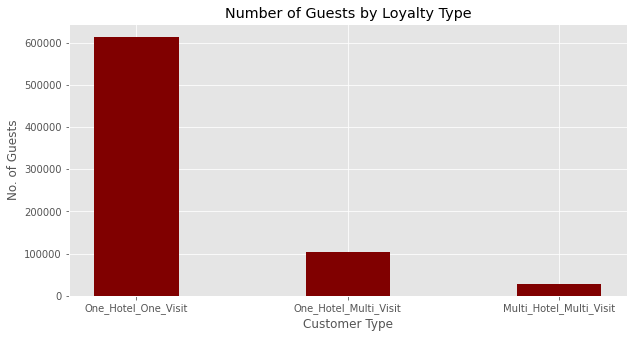

In [182]:
fig = plt.figure(figsize = (10, 5)) 
  
plt.style.use('ggplot')

# creating the bar plot 
plt.bar(guest_loyalty_category_count["Loyalty_Type"], 
        guest_loyalty_category_count["Guest_Count"],
        color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Customer Type") 
plt.ylabel("No. of Guests") 
plt.title("Number of Guests by Loyalty Type") 
plt.show() 

### Analysis 4 : Travel alone or with an Additional Guest

In [207]:
retail_guest_data = guest_data[(guest_data["Main_Cust_ID"] >= 0) & (guest_data["Main_Cust_ID"] < 90400000)][["Guest_ID", "PAX"]]
retail_guest_data

,Guest_ID,PAX
0,3757499,2
1,3757509,2
2,3757460,2
3,3725608,2
4,3725608,2
...,...,...
1052533,3339696,2
1052534,3339700,2
1052535,3339628,1
1052536,3339680,1


In [208]:
# retail_guest_data = retail_guest_data.sort_values(by=["Guest_ID"]).iloc[0:100000].groupby("Guest_ID").apply(pd.DataFrame.mode)["PAX"].to_frame().reset_index()[["Guest_ID", "PAX"]]

# Take the Average of the Persons staying with each guest across all visits. 
retail_guest_data = retail_guest_data.groupby("Guest_ID").mean().round().astype(int)["PAX"].to_frame().reset_index()[["Guest_ID", "PAX"]]
retail_guest_data

,Guest_ID,PAX
0,1,2
1,222,2
2,945,2
3,999,1
4,1466,2
...,...,...
538646,90433272,1
538647,90442007,1
538648,90444632,1
538649,90449416,1


In [209]:
retail_guest_count = retail_guest_data["PAX"].value_counts().reset_index()
retail_guest_count

,index,PAX
0,2,373372
1,1,126112
2,3,23618
3,4,15549


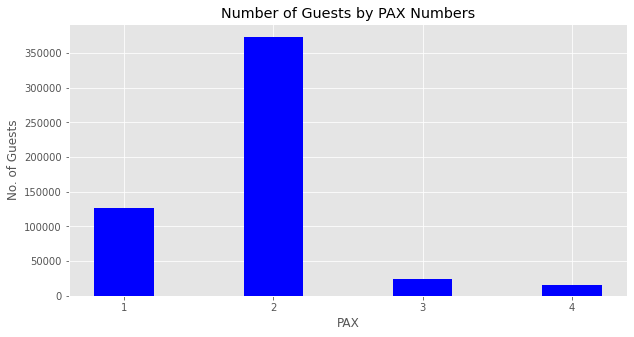

In [211]:
fig = plt.figure(figsize = (10, 5)) 

# creating the bar plot 
plt.bar(retail_guest_count["index"],
        retail_guest_count["PAX"],
        color ='blue',  
        width = 0.4) 

plt.xticks(np.arange(1, 5, 1))
plt.xlabel("PAX") 
plt.ylabel("No. of Guests") 
plt.title("Number of Guests by PAX Numbers") 
plt.show() 

### Analysis 5: Determine Guest (Family / Groups)

In [212]:
retail_guest_data["Family"] = retail_guest_data["PAX"].apply(lambda x : "Y" if x > 1 else "N")
retail_guest_data

,Guest_ID,PAX,Family
0,1,2,Y
1,222,2,Y
2,945,2,Y
3,999,1,N
4,1466,2,Y
...,...,...,...
538646,90433272,1,N
538647,90442007,1,N
538648,90444632,1,N
538649,90449416,1,N


In [217]:
family_guest_share = round(retail_guest_data["Family"].value_counts() / retail_guest_data["Guest_ID"].nunique(), 4) * 100
family_guest_share

Y    76.59
N    23.41
Name: Family, dtype: float64

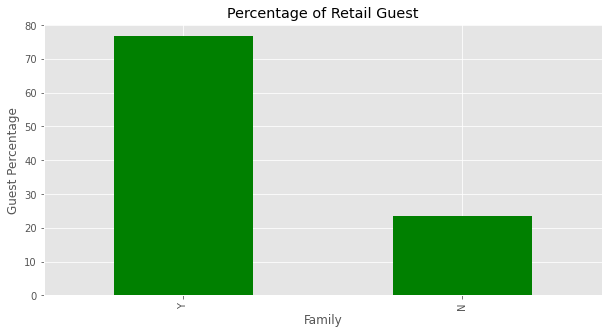

In [222]:
family_guest_share.plot.bar(figsize = (10,5), xlabel="Family", ylabel="Guest Percentage", title="Percentage of Retail Guest", color="green")

### Analysis 6 : Total number of Room nights across stays (for 2 years)

In [223]:
guest_data["Checkout_Date"] = pd.to_datetime(guest_data["Checkout_Date"], dayfirst=True).apply(lambda x : x.date())
guest_data["Checkin_Date"] = pd.to_datetime(guest_data["Checkin_Date"], dayfirst=True).apply(lambda x : x.date())
guest_data["Stay_Length"] = (guest_data["Checkout_Date"] - guest_data["Checkin_Date"]).apply(lambda x : x.days )
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE,Reservation_Count,Stay_Length
0,3757499,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2
1,3757509,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2
2,3757460,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,1,2
3,3725608,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,2,2
4,3725608,BBI1,4084704,90001829,2019-03-29,2019-03-30,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052533,3339696,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1
1052534,3339700,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1
1052535,3339628,VTZ1,3717543,90005463,2018-06-30,2018-07-01,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0,1,1
1052536,3339680,VTZ1,3717596,90005463,2018-06-30,2018-07-02,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0,1,2


In [225]:
# Sum the reservation length per guest to total stay length in past 2 years. 
guest_data.groupby(["Guest_ID"]).sum( )["Stay_Length"]

Guest_ID
1            4
2            0
3            5
26          14
49           4
            ..
90449628     0
90450267     0
90450512     0
90450995     0
90451158     0
Name: Stay_Length, Length: 746302, dtype: int64

In [227]:
guest_data["Stay_Length"].sum()

2176742

### Analysis 7 : Total Number of Unique Guests (and other Unique attributes of data)

In [228]:
guest_data.nunique()

Guest_ID             746302
Hotel_ID                 47
Reservation_ID       724777
Main_Cust_ID          86455
Checkin_Date            730
Checkout_Date           766
PAX                       4
Reg_Date                866
Country_ID              187
Gender                    5
MP                     1965
MEAL                  34621
ROOM                 210210
VAS                   10117
MISC                  36500
EARLY                  3300
LATE                   4542
Reservation_Count        95
Stay_Length             134
dtype: int64

### Analysis 8 : Total Number of Reservations

In [229]:
guest_data["Reservation_ID"].nunique()

724777

### Analysis 9 : Average Length of stay 

In [230]:
guest_data_avg_stay = (guest_data.groupby("Guest_ID").sum( )["Stay_Length"] / guest_data.groupby("Guest_ID").count( )["Reservation_ID"])
guest_data_avg_stay = guest_data_avg_stay.to_frame().reset_index().rename({0:"Average_Stay_Length"}, axis=1)
guest_data_avg_stay

,Guest_ID,Average_Stay_Length
0,1,1.333333
1,2,0.000000
2,3,5.000000
3,26,14.000000
4,49,1.333333
...,...,...
746297,90449628,0.000000
746298,90450267,0.000000
746299,90450512,0.000000
746300,90450995,0.000000


In [231]:
# Average Length of Stay by Guest in Past 2 years
guest_data_avg_stay["Average_Stay_Length"].mean()

1.9840714613704062

In [234]:
# Most Number of guest stay for days on average?
guest_data_avg_stay["Average_Stay_Length"].mode()
# guest_data_avg_stay["Average_Stay_Length"].median()

0    1.0
dtype: float64

In [235]:
guest_data = guest_data.merge(guest_data_avg_stay, how="left", on="Guest_ID")

In [236]:
guest_data.drop_duplicates(ignore_index=True, inplace=True)
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE,Reservation_Count,Stay_Length,Average_Stay_Length
0,3757499,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0
1,3757509,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0
2,3757460,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,1,2,2.0
3,3725608,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,2,2,1.5
4,3725608,BBI1,4084704,90001829,2019-03-29,2019-03-30,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0,2,1,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052533,3339696,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0
1052534,3339700,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0
1052535,3339628,VTZ1,3717543,90005463,2018-06-30,2018-07-01,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0,1,1,1.0
1052536,3339680,VTZ1,3717596,90005463,2018-06-30,2018-07-02,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0,1,2,2.0


In [238]:
guest_data['Guest_Type'] = guest_data['Main_Cust_ID'].apply(lambda x : 
                                                                   'Retail' if x in range(0, 90000000) 
                                                                    else 'TA' if x in range(90000000, 90400000) 
                                                                    else 'Corporate' )

In [239]:
guest_data.groupby(["Guest_Type"]).mean()["Average_Stay_Length"]

Guest_Type
Corporate    3.272292
Retail       1.306889
TA           1.562388
Name: Average_Stay_Length, dtype: float64

### Analysis 10 : Average Visit (Reservations) / Guest

In [249]:
guest_data_avg_visit = guest_data[["Guest_ID", "Reservation_Count"]].drop_duplicates().sort_values(by="Guest_ID")
guest_data_avg_visit

,Guest_ID,Reservation_Count
526467,1,3
359769,2,1
875593,3,1
739536,26,1
339496,49,3
...,...,...
451930,90449628,8
454304,90450267,1
454604,90450512,1
166599,90450995,2


In [251]:
guest_data_avg_visit["Reservation_Count"].mean()

1.4103379061023553

### Analysis 11 : Number & Share of Long Stays (>=5)


In [261]:
long_stay_guest_data = guest_data[guest_data["Stay_Length"] > 5].groupby(["Guest_Type", "Gender"]).count()
long_stay_guest_data = long_stay_guest_data.reset_index()[["Guest_Type", "Gender", "Guest_ID"]].rename(columns={"Guest_ID": "Guest_Count"})
long_stay_guest_data

,Guest_Type,Gender,Guest_Count
0,Corporate,Dr.,254
1,Corporate,Hotel,10
2,Corporate,Mr.,19635
3,Corporate,Ms.,4254
4,Corporate,Undisclosed,19400
5,Retail,Dr.,11
6,Retail,Hotel,1
7,Retail,Mr.,1199
8,Retail,Ms.,426
9,Retail,Undisclosed,865


In [263]:
# Percentage of such guests
num_of_long_stay_guest = long_stay_guest_data["Guest_Count"].sum( ) 
round(num_of_long_stay_guest / num_of_unique_guests, 4 ) * 100

53521

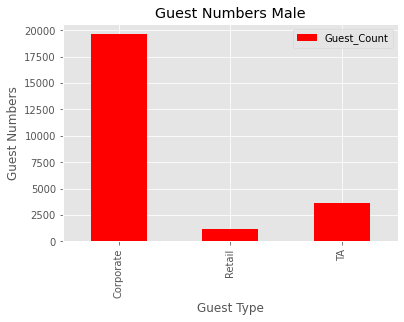

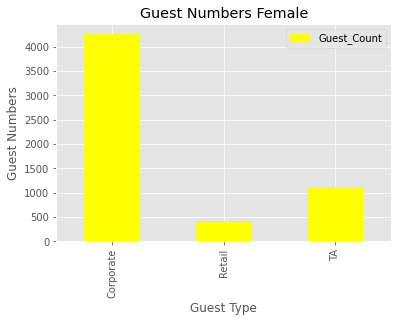

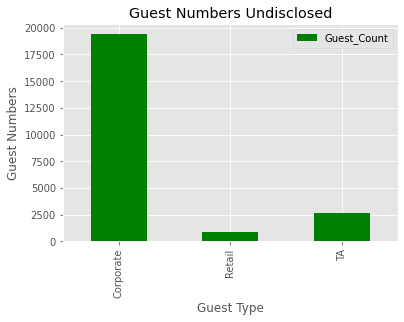

In [280]:
long_stay_guest_data[long_stay_guest_data["Gender"] == "Mr."].plot.bar(x="Guest_Type", xlabel="Guest Type", 
                                                                       ylabel="Guest Numbers", title="Guest Numbers Male",
                                                                       color="red")
long_stay_guest_data[long_stay_guest_data["Gender"] == "Ms."].plot.bar(x="Guest_Type", xlabel="Guest Type", 
                                                                       ylabel="Guest Numbers", title="Guest Numbers Female",
                                                                       color="yellow")
long_stay_guest_data[long_stay_guest_data["Gender"] == "Undisclosed"].plot.bar(x="Guest_Type", xlabel="Guest Type", 
                                                                       ylabel="Guest Numbers", title="Guest Numbers Undisclosed",
                                                                       color="green")

### Analysis 12 : Number & Share of Day Use

In [255]:
day_use_guest_data = guest_data[guest_data["Stay_Length"] == 0]
day_use_guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE,Reservation_Count,Stay_Length,Average_Stay_Length,Guest_Type
367,3600935,AGR1,4001185,90005463,2019-01-06,2019-01-06,2,06.01.2019,IN,Undisclosed,0.0,601.5,1687.6453,0.0,0.00,0.0,0.0,2,0,0.500000,TA
369,3599272,AGR1,4001185,90005463,2019-01-06,2019-01-06,2,06.01.2019,IN,Undisclosed,0.0,601.5,1687.6453,0.0,0.00,0.0,0.0,2,0,0.500000,TA
371,3598788,AGR1,4001186,90005463,2019-01-06,2019-01-06,2,06.01.2019,IN,Undisclosed,0.0,0.0,1687.6453,0.0,0.00,0.0,0.0,2,0,0.500000,TA
373,3599291,AGR1,4001186,90005463,2019-01-06,2019-01-06,2,06.01.2019,IN,Undisclosed,0.0,0.0,1687.6453,0.0,0.00,0.0,0.0,2,0,0.500000,TA
398,3073262,AGR1,3988708,90001812,2019-01-01,2019-01-01,2,28.12.2018,IN,Undisclosed,0.0,0.0,1484.9992,0.0,0.00,0.0,0.0,3,0,0.666667,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052415,3325692,VTZ1,3702828,3325692,2018-06-21,2018-06-21,1,20.06.2018,IN,Undisclosed,0.0,250.0,2464.9020,0.0,2464.90,0.0,0.0,1,0,0.000000,Retail
1052494,3333606,VTZ1,3710913,3333606,2018-06-27,2018-06-27,1,26.06.2018,IN,Undisclosed,0.0,0.0,1532.8200,0.0,1187.63,0.0,0.0,1,0,0.000000,Retail
1052504,3335238,VTZ1,3713242,90002471,2018-06-28,2018-06-28,1,27.06.2018,IN,Undisclosed,0.0,0.0,2035.5000,0.0,0.00,0.0,0.0,1,0,0.000000,TA
1052521,3338368,VTZ1,3716370,90001812,2018-06-30,2018-06-30,1,29.06.2018,IN,Undisclosed,0.0,0.0,1698.3858,0.0,0.00,0.0,0.0,1,0,0.000000,TA


In [ ]:
# Percentage of such guests
round( (day_use_guest_data["Guest_ID"].nunique( ) / guest_data["Guest_ID"].nunique() ), 4 ) * 100

8.16

In [281]:
day_use_guest_type_wise = day_use_guest_data.groupby(["Guest_Type"]).count()
day_use_guest_type_wise = day_use_guest_type_wise.reset_index()[["Guest_Type", "Guest_ID"]].rename(columns={"Guest_ID": "Guest_Count"})
day_use_guest_type_wise

,Guest_Type,Guest_Count
0,Corporate,11733
1,Retail,37293
2,TA,26114


### Analysis 13 : Day Use Breakup - Single and Double Occupancy

In [ ]:
day_use_guest_data.groupby("PAX").count()["Guest_ID"].to_frame().reset_index()

,PAX,Guest_ID
0,0,5157
1,1,25905
2,2,69205
3,3,1270
4,4,1644


### Analysis 14 : Guest Type : Corporate, Travel Agent, Transient Share and number

In [ ]:
guest_data["Guest_Type"].value_counts()

TA           604068
Corporate    385675
Retail       220512
Name: Guest_Type, dtype: int64

In [ ]:
guest_type_share = (guest_data["Guest_Type"].value_counts() / len(guest_data["Guest_ID"].index) ).round(4) * 100

TA           49.91
Corporate    31.87
Retail       18.22
Name: Guest_Type, dtype: float64

In [ ]:
guest_type_share.plot.bar()

### Analysis 15 : Early check-ins & Late Check outs  : Y/N : Share and number

In [285]:
early_or_late_guest_data = guest_data[(guest_data["EARLY"].notna() & guest_data["EARLY"] != 0.0 ) | (guest_data["LATE"].notna() & guest_data["LATE"] != 0.0 )]

In [287]:
number_of_early_or_late_guest = early_or_late_guest_data["Guest_ID"].nunique()
number_of_early_or_late_guest

78336

In [288]:
round(number_of_early_or_late_guest / num_of_unique_guests, 4 ) * 100

10.5

### Analysis 16 : Meal Plans :  Share

In [289]:
meal_plan_guest_data = guest_data[( guest_data["MP"].notna() & guest_data["MP"] != 0.0 ) | (guest_data["MEAL"].notna() & guest_data["MEAL"] != 0.0 )]

In [290]:
# Number of Guests who take a Mean Plan
number_of_meal_plan_guest = meal_plan_guest_data["Guest_ID"].nunique()
number_of_meal_plan_guest

332452

In [292]:
# Share of such guests
round(number_of_meal_plan_guest/ num_of_unique_guests, 4 ) * 100

44.55

### Analysis 17 : Number and Share of Top Hotels

In [293]:
top_hotels_list = ["AGR1","AMD3","DEL1","GUW1","NOI1","BOM2","DEL2","GOI1",
                   "BOM5","AMD1","BLR1", "BLR2","BOM6","GGN1","GOI3","LKO2",
                   "MAA1","MAA2","TRV1","JAI1","NOI3","AMD4", "GGN4"]  

In [294]:
guest_data["Top_Hotel"] = guest_data["Hotel_ID"].apply(lambda x : 'Y' if x in top_hotels_list else 'N')
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE,Reservation_Count,Stay_Length,Average_Stay_Length,Guest_Type,Top_Hotel
0,3757499,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0,TA,Y
1,3757509,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0,TA,Y
2,3757460,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,1,2,2.0,TA,Y
3,3725608,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,2,2,1.5,TA,Y
4,3725608,BBI1,4084704,90001829,2019-03-29,2019-03-30,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0,2,1,1.5,TA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052533,3339696,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0,TA,N
1052534,3339700,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0,TA,N
1052535,3339628,VTZ1,3717543,90005463,2018-06-30,2018-07-01,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0,1,1,1.0,TA,N
1052536,3339680,VTZ1,3717596,90005463,2018-06-30,2018-07-02,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0,1,2,2.0,TA,N


In [297]:
number_of_guest_top_hotel = guest_data[guest_data["Top_Hotel"] == 'Y' ]["Guest_ID"].nunique()
number_of_guest_top_hotel

395594

In [299]:
round(number_of_guest_top_hotel / num_of_unique_guests, 4 ) * 100

53.010000000000005

In [300]:
%whos

Variable                            Type         Data/Info
----------------------------------------------------------
data                                DataFrame           XHOTEL_ID  XHOTEL_<...>[245762 rows x 8 columns]
day_use_guest_data                  DataFrame             Guest_ID Hotel_I<...>[75140 rows x 21 columns]
day_use_guest_type_wise             DataFrame      Guest_Type  Guest_Count<...>2         TA        26114
drive                               module       <module 'google.colab.dri<...>s/google/colab/drive.py'>
early_or_late_guest_data            DataFrame             Guest_ID Hotel_I<...>[87922 rows x 21 columns]
family_guest_share                  Series       Y    76.59\nN    23.41\nN<...>e: Family, dtype: float64
fig                                 Figure       Figure(720x360)
file                                str          /content/drive/MyDrive/AA<...>jan 18 to 30th june18.csv
glob                                module       <module 'glob' from '/usr/lib/pyt

In [301]:
del guest_data_avg_stay
del guest_data_avg_visit
del guest_not_cust_path
del guest_with_10plus_reserv_path
del guest_with_10plus_reservation
del guest_with_reservation
del hueres_data
del hueres_path
del kna1_data
del kna1_path
del linfol_copy
del linfol_path
del linfol_data
del rsrvs_data
del rsrvs_path

### Analysis 19 : Total Room Only Spent

In [302]:
guest_data.fillna(value = 0.0, inplace = True )
room_only_groupby_guest = guest_data[ (guest_data["MP"] == 0.0)    & (guest_data["MEAL"] == 0.0) &
                                    (guest_data["VAS"] == 0.0)   & (guest_data["MISC"] == 0.0) & 
                                    (guest_data["EARLY"] == 0.0) & (guest_data["LATE"] == 0.0) & 
                                     (guest_data["ROOM"] != 0.0 )
                                   ].groupby("Guest_ID")

room_only_spent = room_only_groupby_guest.sum()["ROOM"].reset_index()
room_only_spent.rename(columns = {'ROOM': 'Room_Only_Spent'}, inplace=True)
room_only_spent

,Guest_ID,Room_Only_Spent
0,2,3864.5000
1,222,3538.8200
2,945,3854.8838
3,1705,2950.3740
4,1809,1108.3772
...,...,...
158023,90436080,14214.0440
158024,90442007,6217.2000
158025,90443203,3776.0000
158026,90444886,2950.0000


### Analysis 20 : Average Room Only Spent

In [303]:
room_only_spent["Total_Room_Only_Visits"] = room_only_groupby_guest.count( ).reset_index()['ROOM']
room_only_spent["Average_Room_Only"] = room_only_spent["Room_Only_Spent"] / room_only_spent["Total_Room_Only_Visits"]
room_only_spent

,Guest_ID,Room_Only_Spent,Total_Room_Only_Visits,Average_Room_Only
0,2,3864.5000,1,3864.5000
1,222,3538.8200,1,3538.8200
2,945,3854.8838,2,1927.4419
3,1705,2950.3740,2,1475.1870
4,1809,1108.3772,1,1108.3772
...,...,...,...,...
158023,90436080,14214.0440,2,7107.0220
158024,90442007,6217.2000,2,3108.6000
158025,90443203,3776.0000,2,1888.0000
158026,90444886,2950.0000,1,2950.0000


In [304]:
room_only_spent.sort_values(by="Average_Room_Only", ascending=False)

,Guest_ID,Room_Only_Spent,Total_Room_Only_Visits,Average_Room_Only
154336,3756288,332978.458000,1,332978.458000
26776,2891507,217119.882000,1,217119.882000
45818,3047190,141741.600000,1,141741.600000
73086,3228210,125518.960000,1,125518.960000
155736,3761934,125353.890000,1,125353.890000
...,...,...,...,...
94226,3394735,23.833333,1,23.833333
5834,2464441,11.500000,1,11.500000
5822,2463798,11.500000,1,11.500000
2014,1996620,0.400000,1,0.400000


### Analysis 21 : Total Overall Spent

In [307]:
guest_data["Total_Spent"] = guest_data[["MP", "MEAL", 'ROOM', 'VAS', 'MISC', 'EARLY', 'LATE']].sum(axis = 1)
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE,Reservation_Count,Stay_Length,Average_Stay_Length,Guest_Type,Top_Hotel,Total_Spent
0,3757499,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0,TA,Y,13407.8650
1,3757509,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0,TA,Y,13407.8650
2,3757460,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,1,2,2.0,TA,Y,18306.8600
3,3725608,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,2,2,1.5,TA,Y,18306.8600
4,3725608,BBI1,4084704,90001829,2019-03-29,2019-03-30,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0,2,1,1.5,TA,N,1910.9531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052533,3339696,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1768.8908
1052534,3339700,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1768.8908
1052535,3339628,VTZ1,3717543,90005463,2018-06-30,2018-07-01,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1769.8112
1052536,3339680,VTZ1,3717596,90005463,2018-06-30,2018-07-02,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0,1,2,2.0,TA,N,1902.8112


### Analysis 22 : Average Overall Spent

In [309]:
guest_data['Average_Spent'] = ( guest_data['Total_Spent'] ) / guest_data['Reservation_Count']
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE,Reservation_Count,Stay_Length,Average_Stay_Length,Guest_Type,Top_Hotel,Total_Spent,Average_Spent
0,3757499,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0,TA,Y,13407.8650,13407.86500
1,3757509,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0,TA,Y,13407.8650,13407.86500
2,3757460,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,1,2,2.0,TA,Y,18306.8600,18306.86000
3,3725608,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,2,2,1.5,TA,Y,18306.8600,9153.43000
4,3725608,BBI1,4084704,90001829,2019-03-29,2019-03-30,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0,2,1,1.5,TA,N,1910.9531,955.47655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052533,3339696,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1768.8908,1768.89080
1052534,3339700,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1768.8908,1768.89080
1052535,3339628,VTZ1,3717543,90005463,2018-06-30,2018-07-01,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1769.8112,1769.81120
1052536,3339680,VTZ1,3717596,90005463,2018-06-30,2018-07-02,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0,1,2,2.0,TA,N,1902.8112,1902.81120


### Analysis 23 : Total/Average Meal Spent

In [311]:
guest_data['Average_Meal_Spent'] = ( guest_data['MP'] + guest_data['MEAL'] ) / guest_data['Reservation_Count']
guest_data

,Guest_ID,Hotel_ID,Reservation_ID,Main_Cust_ID,Checkin_Date,Checkout_Date,PAX,Reg_Date,Country_ID,Gender,MP,MEAL,ROOM,VAS,MISC,EARLY,LATE,Reservation_Count,Stay_Length,Average_Stay_Length,Guest_Type,Top_Hotel,Total_Spent,Average_Spent,Average_Meal_Spent
0,3757499,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0,TA,Y,13407.8650,13407.86500,2265.6
1,3757509,AGR1,3694355,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,4898.995,0.0,0.0,1,2,2.0,TA,Y,13407.8650,13407.86500,2265.6
2,3757460,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,1,2,2.0,TA,Y,18306.8600,18306.86000,2265.6
3,3725608,AGR1,3694356,90003186,2019-04-20,2019-04-22,2,05.06.2018,IN,Undisclosed,2265.6,0.0,6243.2700,0.0,9797.990,0.0,0.0,2,2,1.5,TA,Y,18306.8600,9153.43000,1132.8
4,3725608,BBI1,4084704,90001829,2019-03-29,2019-03-30,2,25.02.2019,IN,Undisclosed,0.0,0.0,1910.9531,0.0,0.000,0.0,0.0,2,1,1.5,TA,N,1910.9531,955.47655,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052533,3339696,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1768.8908,1768.89080,0.0
1052534,3339700,VTZ1,3717484,90005463,2018-06-30,2018-07-01,2,30.06.2018,IN,Undisclosed,0.0,0.0,1768.8908,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1768.8908,1768.89080,0.0
1052535,3339628,VTZ1,3717543,90005463,2018-06-30,2018-07-01,1,30.06.2018,IN,Undisclosed,0.0,236.0,1533.8112,0.0,0.000,0.0,0.0,1,1,1.0,TA,N,1769.8112,1769.81120,236.0
1052536,3339680,VTZ1,3717596,90005463,2018-06-30,2018-07-02,1,30.06.2018,IN,Undisclosed,0.0,369.0,1533.8112,0.0,0.000,0.0,0.0,1,2,2.0,TA,N,1902.8112,1902.81120,369.0


### Analysis 24 : Gender Share

In [312]:
# Determine the Percentage of Males
guest_data[guest_data["Gender"] == "Mr."]["Gender"].count( )/(len(guest_data["Gender"]))  * 100

45.28948123488178

In [313]:
# Determine the  Percentage of (Married/Unmarried) Females
guest_data[(guest_data["Gender"] == "Ms.") | (guest_data["Gender"] == "Mrs.")]["Gender"].count( )/(len(guest_data["Gender"]))  * 100

18.574911309615423

In [314]:
# Determine the  Percentage of Undislosed Gender
guest_data[(guest_data["Gender"] == "Undisclosed")]["Gender"].count( )/(len(guest_data["Gender"]))  * 100

35.71595514841269

In [315]:
round( (guest_data.groupby(["Gender"]).count( )["Guest_ID"]/(len(guest_data["Gender"].index))), 4 ) * 100

Gender
Dr.             0.38
Hotel           0.04
Mr.            45.29
Ms.            18.57
Undisclosed    35.72
Name: Guest_ID, dtype: float64

### Analysis 25 : Total No of stays with at least 1 addon

In [316]:
guest_data[(guest_data['MP'] != 0.0)   | (guest_data['MEAL'] != 0.0)	| (guest_data['VAS'] != 0.0) | 
           (guest_data['MISC'] != 0.0) | (guest_data['EARLY'] != 0.0)	| (guest_data['LATE'] != 0.0) 
         ].groupby("Guest_ID").count().reset_index()[["Guest_ID", "Reservation_ID"]].rename(columns = {"Reservation_ID": "Reservation_Count"})

,Guest_ID,Reservation_Count
0,1,2
1,3,1
2,26,1
3,49,2
4,945,3
...,...,...
468183,90449628,2
468184,90450267,1
468185,90450512,1
468186,90450995,2
